<a href="https://colab.research.google.com/github/OlegV12/Data-Analysis-Algorithms/blob/Lesson_8/Alg_Lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.linalg import svd

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data

In [3]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

Можно ли отобрать наиболее значимые признаки с помощью PCA?



Думаю, что это возможно, но с некоторыми оговорками.  т.к. PCA улавливает только линейные зависимости.  Думаю, что корректность применения данной реализации будет сильно зависеть от конкретного дата сета. 

Посмотрим важность карждого признака для каждой из компонент. 

In [4]:
pca = PCA(n_components=2)

In [5]:
X_new = pca.fit_transform(X_)

In [6]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


В первой компонненте важные признаки 1, 3, 4. 
Во второй 2й признак. 

Для самостоятельной работы

(*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()


In [11]:
def my_pca(n_components, X):
    U, D, V = svd(X)
    
    pairs = sorted([(np.abs(D[spam]), V[spam]) for spam in range(len(D))], reverse=True)
    pairs = pairs[:n_components]

    result = X.dot((np.array([list(itm[1]) for itm in pairs])).T)

    return result

In [12]:
eggs = my_pca(2, X_)
eggs

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

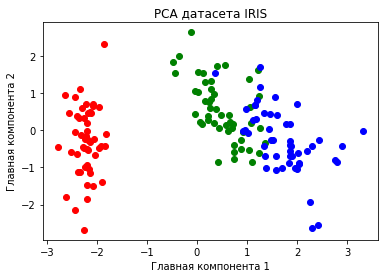

In [13]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(eggs[y==i, 0], eggs[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()